In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('fivethirtyeight')
from matplotlib.ticker import ScalarFormatter

# 1. Load Data

In [2]:
trafficWB_merged = pd.read_csv('InitialWB_data.csv',parse_dates=True)

In [3]:
trafficEB_merged = pd.read_csv('InitialEB_data.csv',parse_dates=True)

In [4]:
trafficEB_merged

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,...,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type
0,2018-01-01 00:00:00,1620011,2.0,715.0,174.654350,-36.858153,6075,Dec,Continuous,4.3,...,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday
1,2018-01-01 01:00:00,1620011,2.0,749.0,174.654350,-36.858153,6075,Dec,Continuous,4.3,...,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday
2,2018-01-01 02:00:00,1620011,2.0,441.0,174.654350,-36.858153,6075,Dec,Continuous,4.3,...,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday
3,2018-01-01 03:00:00,1620011,2.0,404.0,174.654350,-36.858153,6075,Dec,Continuous,4.3,...,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday
4,2018-01-01 04:00:00,1620011,2.0,329.0,174.654350,-36.858153,6075,Dec,Continuous,4.3,...,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019-12-31 19:00:00,1659011,5.0,249.0,174.654032,-36.858004,6123,Ramp,Continuous,10.6,...,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday
105116,2019-12-31 20:00:00,1659011,5.0,204.0,174.654032,-36.858004,6123,Ramp,Continuous,10.6,...,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday
105117,2019-12-31 21:00:00,1659011,5.0,193.0,174.654032,-36.858004,6123,Ramp,Continuous,10.6,...,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday
105118,2019-12-31 22:00:00,1659011,5.0,216.0,174.654032,-36.858004,6123,Ramp,Continuous,10.6,...,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday


# 2. Check for na

In [8]:
trafficWB_merged.isna().sum()

startDatetime             0
siteRef                   0
direction              3580
count                  3580
X                         0
Y                         0
OBJECTID                  0
lane                      0
type                      0
percentHeavy              0
description               0
acceptedDays              0
AADT5yearsAgo             0
AADT4yearsAgo             0
AADT3yearsAgo             0
AADT2yearsAgo             0
AADT1yearAgo              0
siteType                  0
date                      0
Date time                 0
Minimum Temperature       0
Maximum Temperature       0
Temperature               0
Dew Point                 0
Relative Humidity         0
Wind Speed                0
Precipitation             0
Precipitation Cover       0
Visibility                0
Cloud Cover               0
Sea Level Pressure        0
Conditions                0
Hol_type                  0
dtype: int64

In [9]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [10]:
trafficWB_merged.dtypes

startDatetime           object
siteRef                  int64
direction              float64
count                  float64
X                      float64
Y                      float64
OBJECTID                 int64
lane                    object
type                    object
percentHeavy           float64
description             object
acceptedDays           float64
AADT5yearsAgo          float64
AADT4yearsAgo          float64
AADT3yearsAgo          float64
AADT2yearsAgo          float64
AADT1yearAgo           float64
siteType                object
date                    object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Dew Point              float64
Relative Humidity      float64
Wind Speed             float64
Precipitation          float64
Precipitation Cover    float64
Visibility             float64
Cloud Cover            float64
Sea Level Pressure     float64
Conditions              object
Hol_type

In [11]:
#convert all time columns to datetime
trafficWB_merged['startDatetime'] = pd.to_datetime(trafficWB_merged['startDatetime'])
trafficEB_merged['startDatetime'] = pd.to_datetime(trafficEB_merged['startDatetime'])

In [12]:
trafficWB_merged['date'] = pd.to_datetime(trafficWB_merged['date'])
trafficEB_merged['date'] = pd.to_datetime(trafficEB_merged['date'])

In [13]:
trafficWB_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   startDatetime        87600 non-null  datetime64[ns]
 1   siteRef              87600 non-null  int64         
 2   direction            84020 non-null  float64       
 3   count                84020 non-null  float64       
 4   X                    87600 non-null  float64       
 5   Y                    87600 non-null  float64       
 6   OBJECTID             87600 non-null  int64         
 7   lane                 87600 non-null  object        
 8   type                 87600 non-null  object        
 9   percentHeavy         87600 non-null  float64       
 10  description          87600 non-null  object        
 11  acceptedDays         87600 non-null  float64       
 12  AADT5yearsAgo        87600 non-null  float64       
 13  AADT4yearsAgo        87600 non-

In [14]:
trafficWB_merged['day'] = trafficWB_merged['startDatetime'].dt.day
trafficEB_merged['day'] = trafficEB_merged['startDatetime'].dt.day

In [15]:
trafficWB_merged['time']= trafficWB_merged['startDatetime'].dt.time
trafficEB_merged['time']= trafficEB_merged['startDatetime'].dt.time

In [16]:
trafficWB_merged['month']= trafficWB_merged['startDatetime'].dt.month
trafficEB_merged['month']= trafficEB_merged['startDatetime'].dt.month

In [17]:
trafficWB_merged['hour']= trafficWB_merged['startDatetime'].dt.hour
trafficEB_merged['hour']= trafficEB_merged['startDatetime'].dt.hour

In [18]:
trafficWB_merged['dayOfweek']= trafficWB_merged['startDatetime'].dt.dayofweek
trafficEB_merged['dayOfweek']= trafficEB_merged['startDatetime'].dt.dayofweek

In [19]:
trafficWB_merged['year']= trafficWB_merged['startDatetime'].dt.year
trafficEB_merged['year']= trafficEB_merged['startDatetime'].dt.year

# 2. Initial visualisations

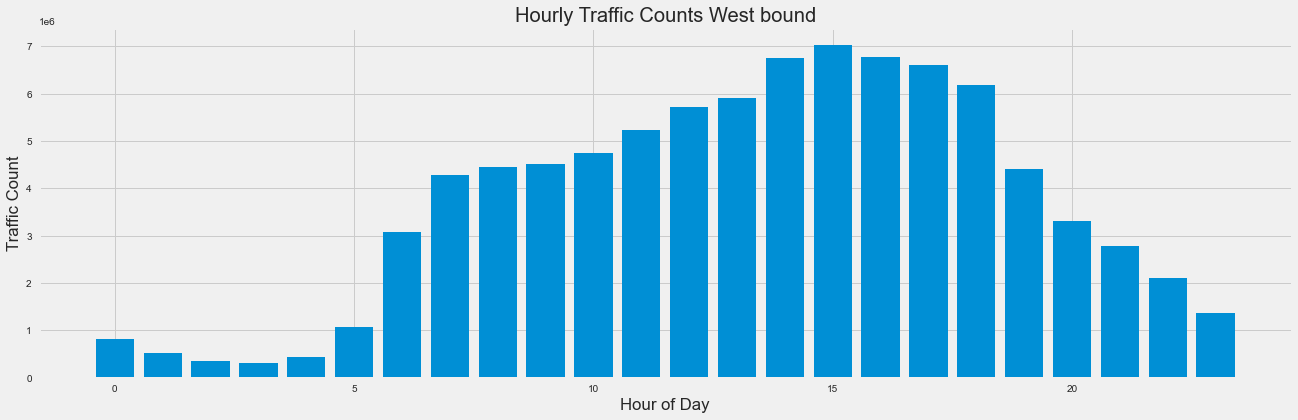

In [59]:

# Group by hour of day and sum the traffic counts for each hour
hourly_data = trafficWB_merged.groupby(trafficWB_merged['startDatetime'].dt.hour)['count'].sum()

# Create a line plot of the hourly traffic counts
plt.figure(figsize=(20, 6))
plt.bar(hourly_data.index, hourly_data.values)
plt.title('Hourly Traffic Counts West bound')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Count')
plt.show()

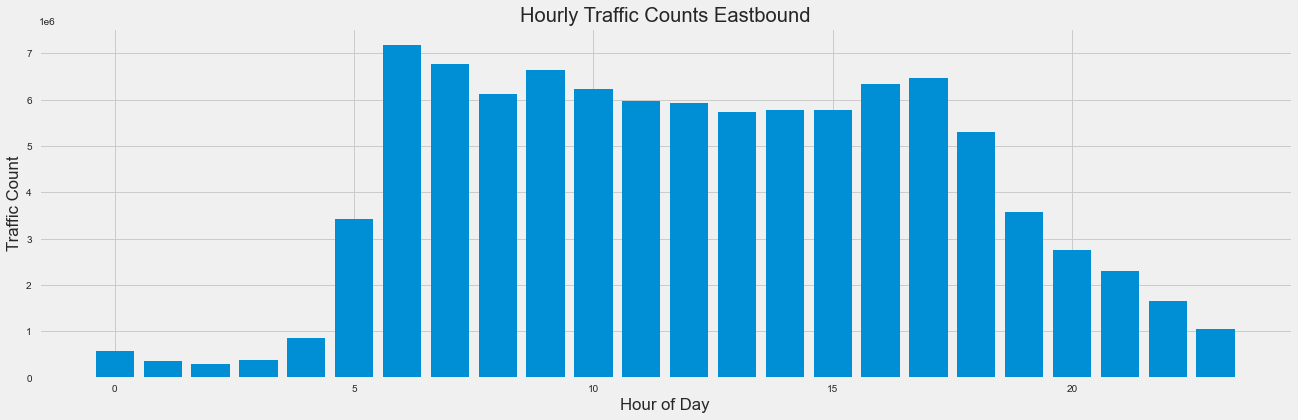

In [60]:
# Group by hour of day and sum the traffic counts for each hour
hourly_dataEB = trafficEB_merged.groupby(trafficEB_merged['startDatetime'].dt.hour)['count'].sum()

# Create a line plot of the hourly traffic counts
plt.figure(figsize=(20, 6))
plt.bar(hourly_dataEB.index, hourly_dataEB.values)
plt.title('Hourly Traffic Counts Eastbound')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Count')
plt.show()

In [61]:
def plot_hourly_traffic(df, holiday_type, direction):
    # Filter the dataframe to include only the specified holiday type
    holiday_data = df[df['Hol_type'] == holiday_type]

    # Group by hour of day and sum the traffic counts for each hour
    hourly_data = holiday_data.groupby(holiday_data['startDatetime'].dt.hour)['count'].sum()

    # Create a bar plot of the hourly traffic counts
    plt.figure(figsize=(20, 6))
    plt.bar(hourly_data.index, hourly_data.values)
    plt.title(f'Hourly Traffic Counts {direction} on {holiday_type}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Traffic Count')
    plt.show()

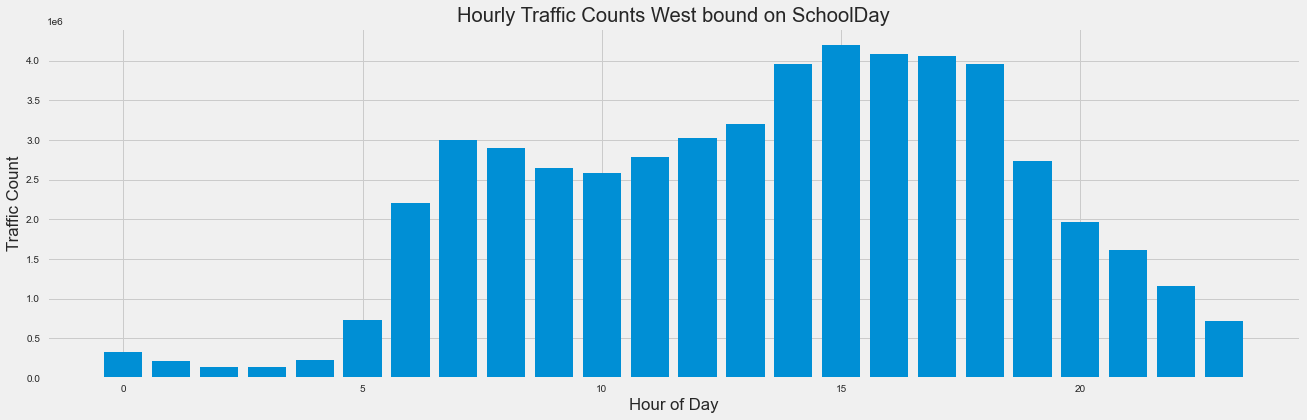

In [62]:
#plot hourly traffic counts on school days
plot_hourly_traffic(trafficWB_merged, 'SchoolDay', 'West bound')


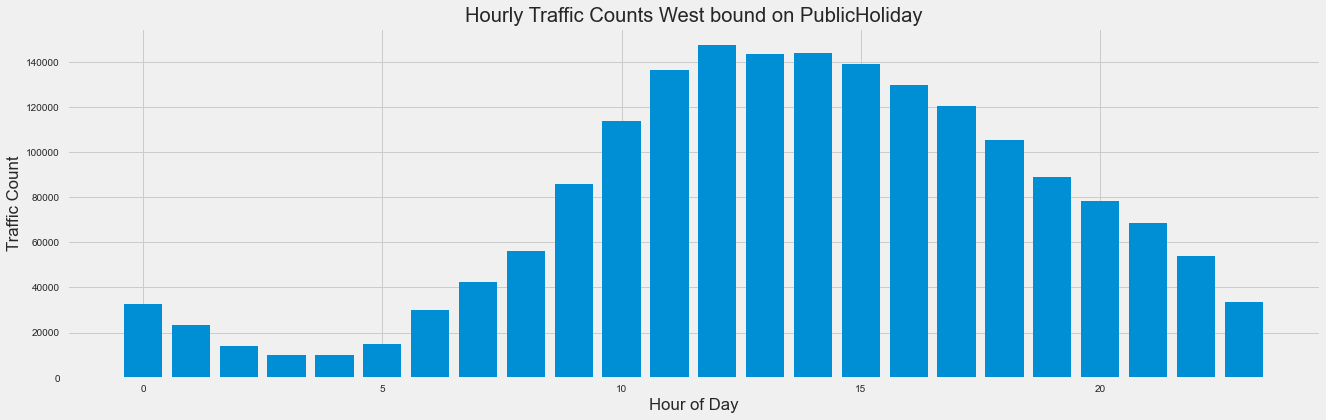

In [63]:
#plot hourly traffic counts on public holidays
plot_hourly_traffic(trafficWB_merged, 'PublicHoliday', 'West bound')


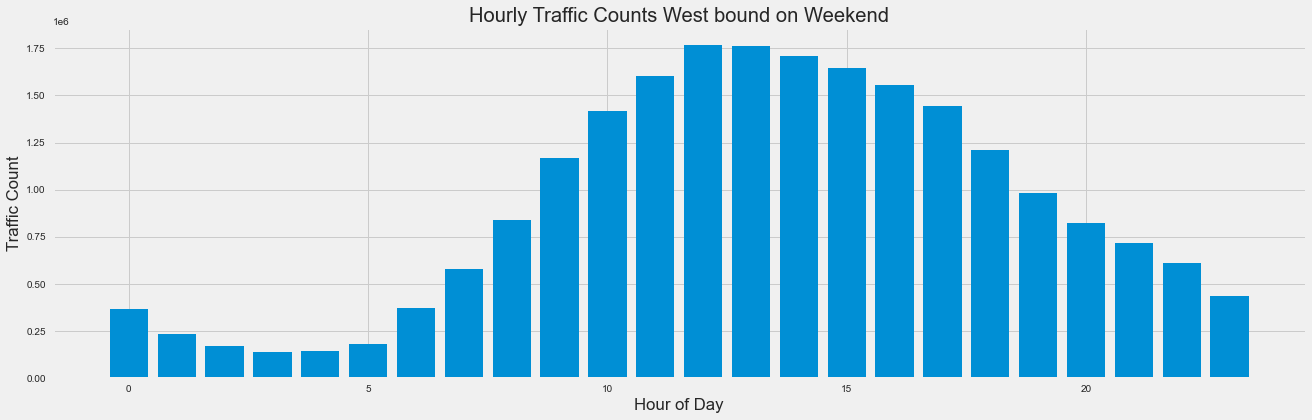

In [64]:
#plot hourly traffic counts on weekends
plot_hourly_traffic(trafficWB_merged, 'Weekend', 'West bound')

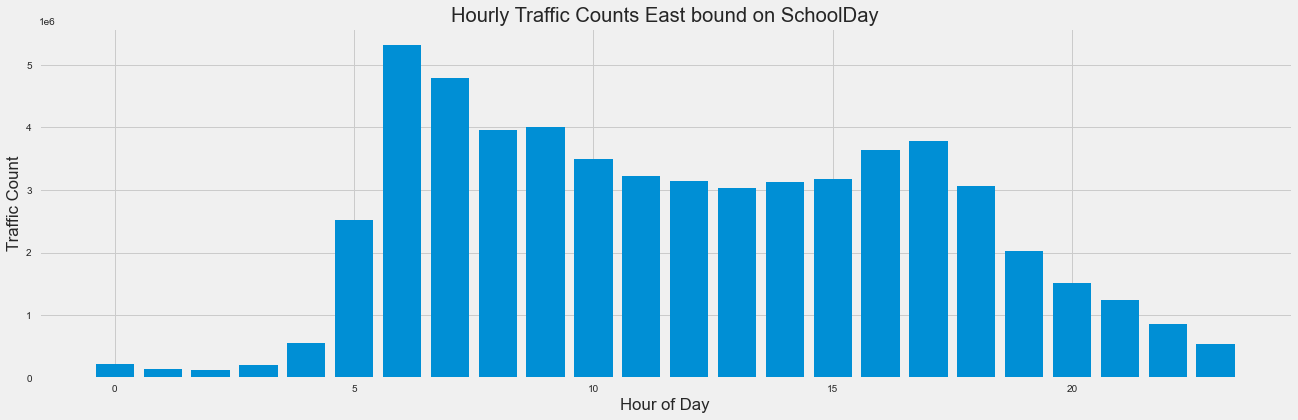

In [65]:
#plot hourly traffic counts on school days
plot_hourly_traffic(trafficEB_merged, 'SchoolDay', 'East bound')


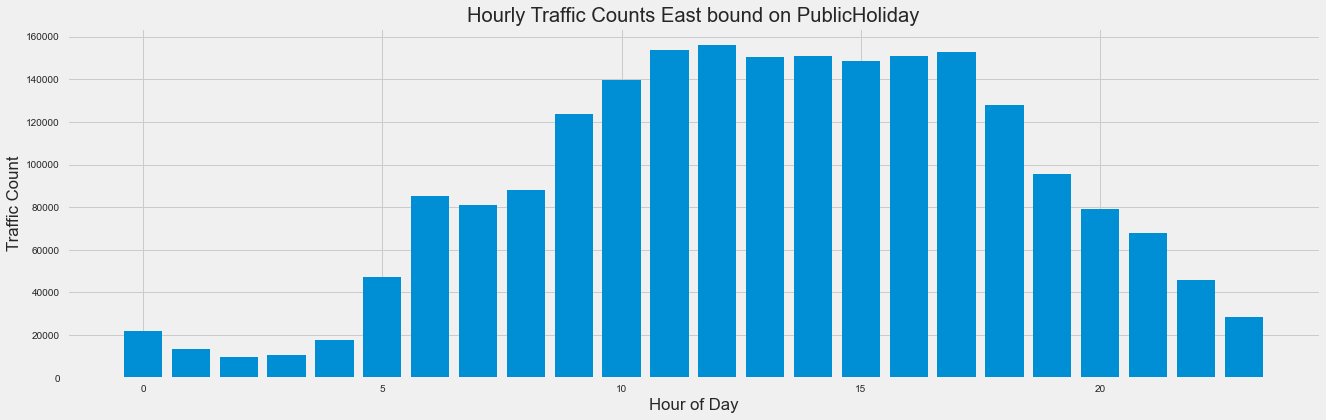

In [66]:
#plot hourly traffic counts on public holidays
plot_hourly_traffic(trafficEB_merged, 'PublicHoliday', 'East bound')

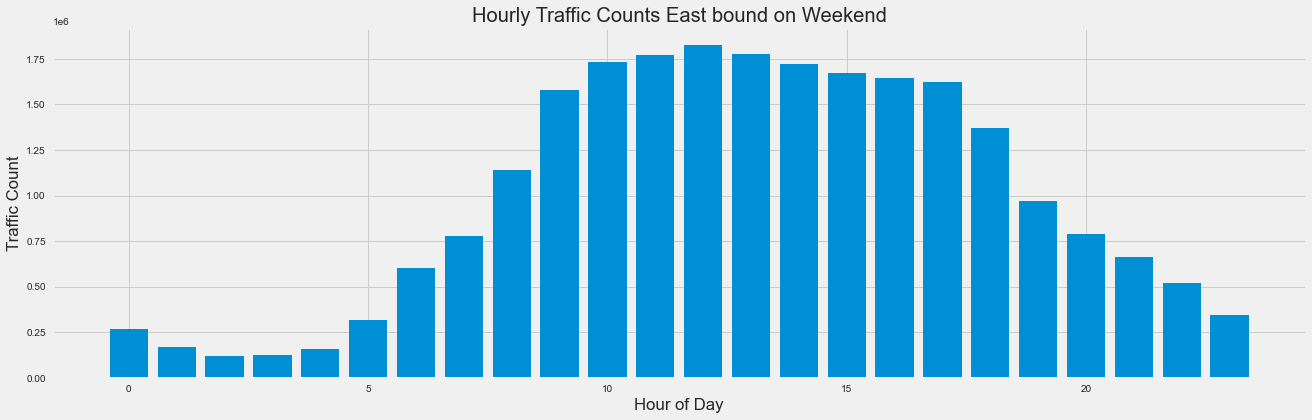

In [67]:
#plot hourly traffic counts on weekends
plot_hourly_traffic(trafficEB_merged, 'Weekend', 'East bound')

In [83]:
def plot_hourly_traffic_all(df, direction):
    holiday_types = df['Hol_type'].unique()
    fig, axs = plt.subplots(len(holiday_types), 1, figsize=(20, 3 * len(holiday_types)))
    fig.suptitle('Hourly Traffic Counts ' + direction, fontsize=14, y=0.92)
  

    for i, holiday_type in enumerate(holiday_types):
        holiday_data = df[df['Hol_type'] == holiday_type]
        hourly_data = holiday_data.groupby(holiday_data['startDatetime'].dt.hour)['count'].sum()

        axs[i].bar(hourly_data.index, hourly_data.values)
        axs[i].set_title('Hourly Traffic Counts - ' + holiday_type)
        axs[i].set_xlabel('Hour of Day')
        axs[i].set_ylabel('Traffic Count')
        # Format the y-axis tick labels to show full numbers
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(False)
        axs[i].yaxis.set_major_formatter(formatter)


        
    plt.tight_layout()
    plt.show()

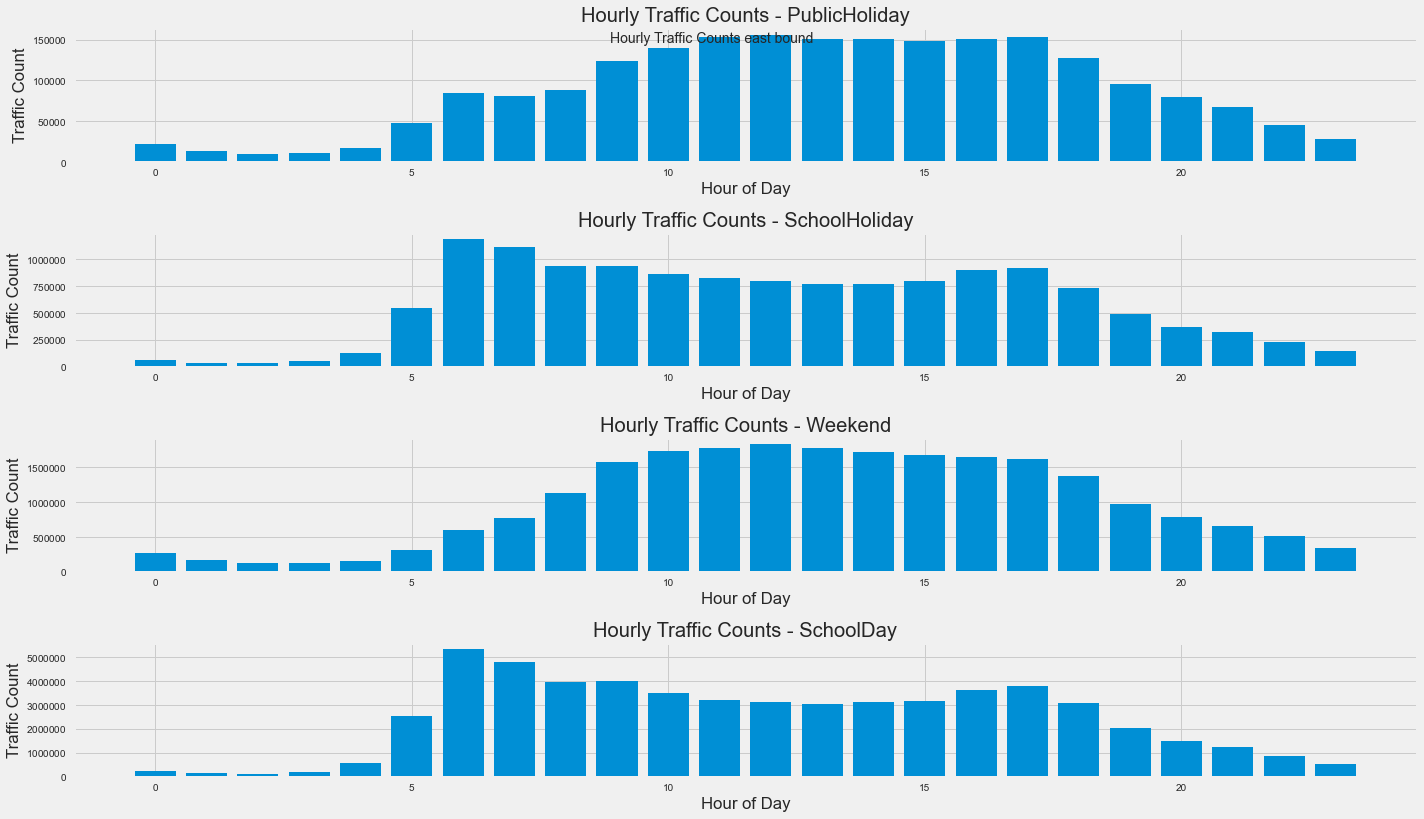

In [84]:
plot_hourly_traffic_all(trafficEB_merged, 'east bound')

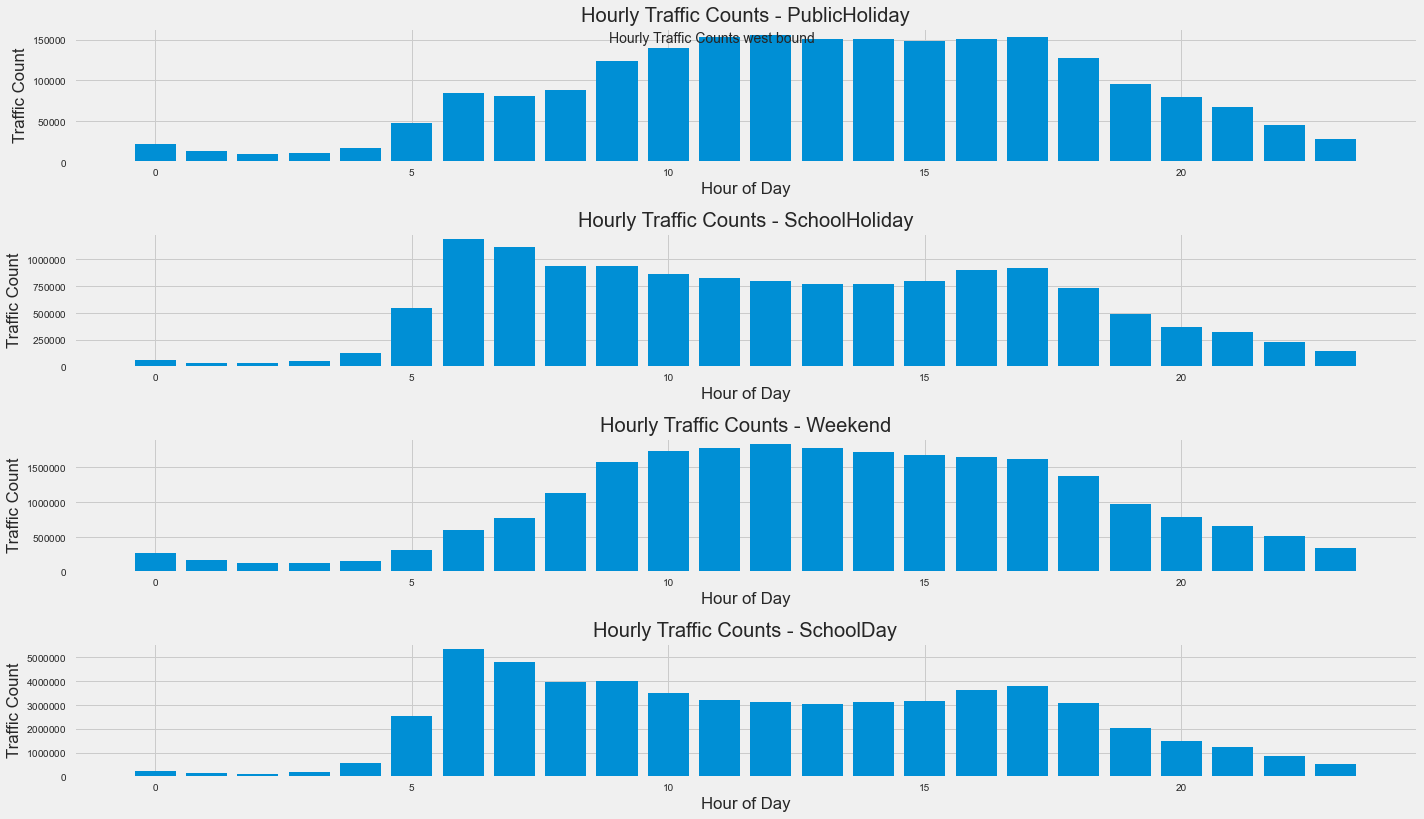

In [85]:
plot_hourly_traffic_all(trafficEB_merged, 'west bound')

In [86]:
def plot_daily_traffic(df, direction):
    # Group by date and sum the traffic counts for each day
    daily_data = df.groupby(df['startDatetime'].dt.date)['count'].sum()

    # Create a line plot of the daily traffic counts
    plt.figure(figsize=(20, 6))
    daily_data.plot()
    plt.title('Daily Traffic Counts {} Direction'.format(direction))
    plt.xlabel('Date')
    plt.ylabel('Traffic Count')
    plt.show()

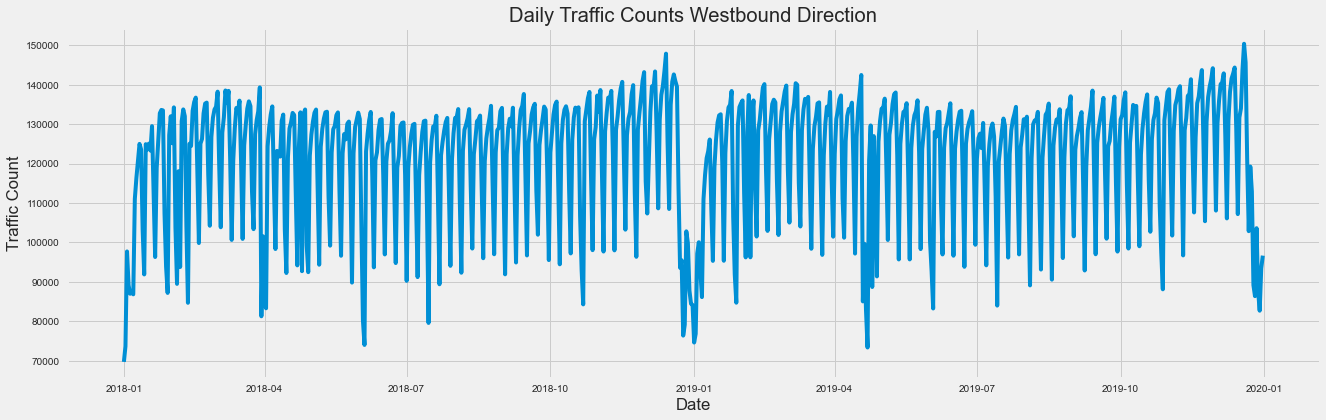

In [87]:
plot_daily_traffic(trafficWB_merged, 'Westbound')


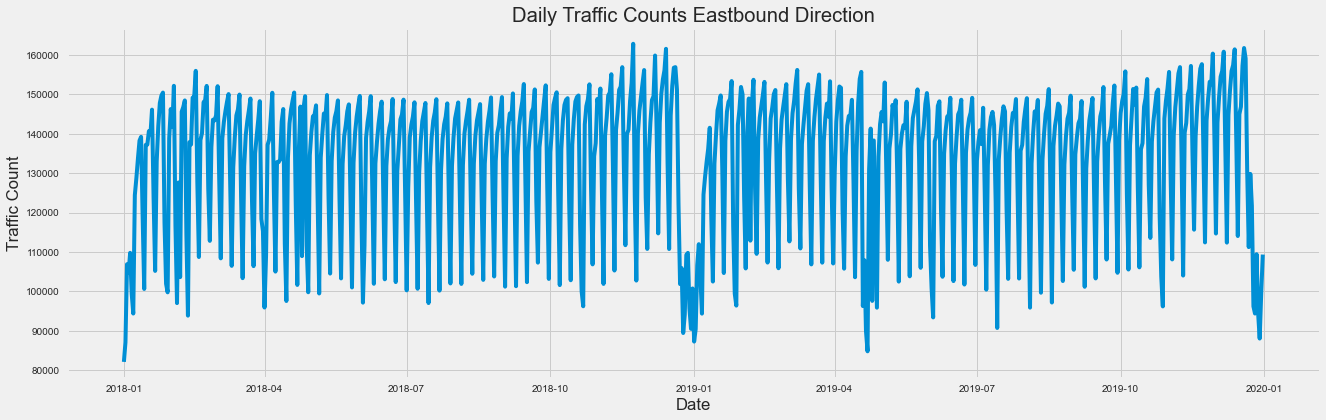

In [88]:
plot_daily_traffic(trafficEB_merged, 'Eastbound')


In [89]:
def plot_daily_traffic_sites(df, direction):
    """
    Plots daily traffic counts for each siteRef on the same graph.
    """
    # Create a list of unique siteRefs
    site_refs = df['siteRef'].unique()
    
    # Create a new dataframe with a timeseries for each day and siteRef
    daily_counts = pd.DataFrame()
    for site in site_refs:
        site_df = df[df['siteRef'] == site]
        site_counts = site_df.resample('D', on='startDatetime')['count'].sum()
        daily_counts[site] = site_counts
        
    # Create a line plot of the daily traffic counts for each siteRef
    plt.figure(figsize=(20, 6))
    for site in site_refs:
        plt.plot(daily_counts.index, daily_counts[site], label=site)
    plt.title(f'Daily Traffic Counts ({direction} bound)')
    plt.xlabel('Date')
    plt.ylabel('Traffic Count')
    plt.legend()
    plt.show()


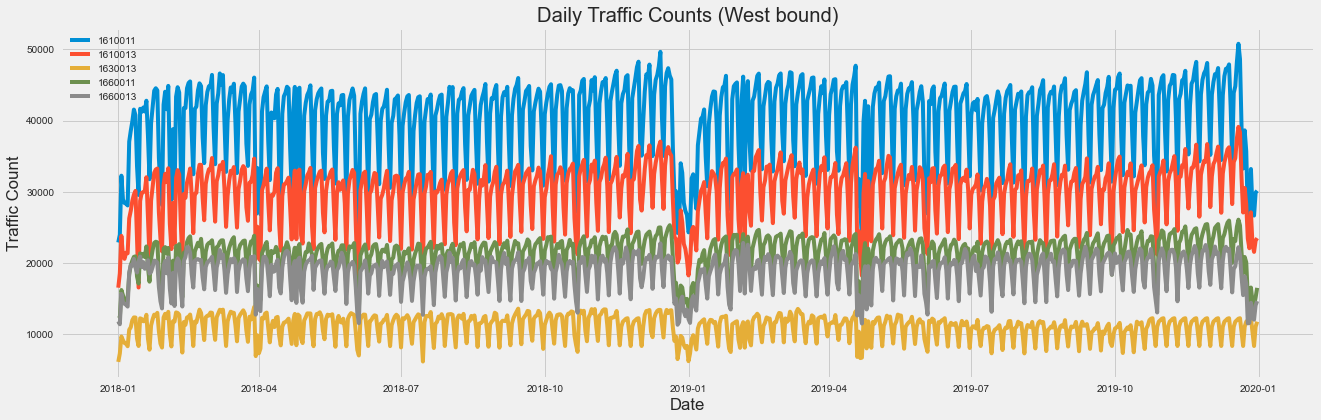

In [90]:
plot_daily_traffic_sites(trafficWB_merged, 'West')




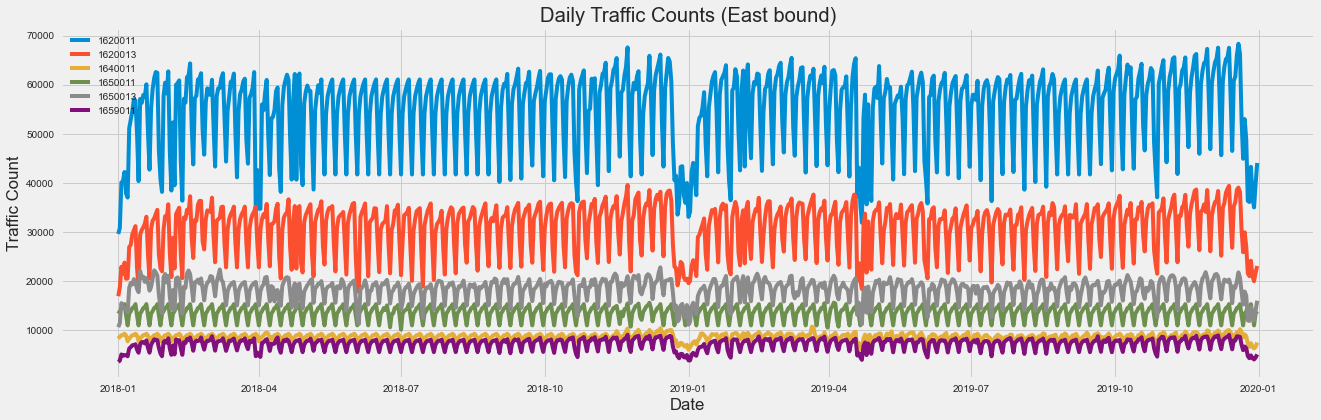

In [91]:
plot_daily_traffic_sites(trafficEB_merged, 'East')

In [92]:
def plot_avg_traffic_counts_by_conditions(df):
    """
    Plots the average traffic counts grouped by date and conditions.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df = df.copy()
    
    # Create a new column with a date-only version of 'startDatetime'
    df['date'] = df['startDatetime'].dt.date
    
    # Group the DataFrame by date and conditions, and calculate the mean count for each group
    groupby_cols = ['date', 'Conditions']
    daily_avg_counts = df.groupby(groupby_cols)['count'].mean().reset_index()
    
    # Create a bar chart of the daily average traffic counts grouped by conditions
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Conditions', y='count', data=daily_avg_counts)
    plt.title('Daily Average Traffic Counts by Conditions')
    plt.xlabel('Conditions')
    plt.ylabel('Daily Average Traffic Count')
    plt.show()



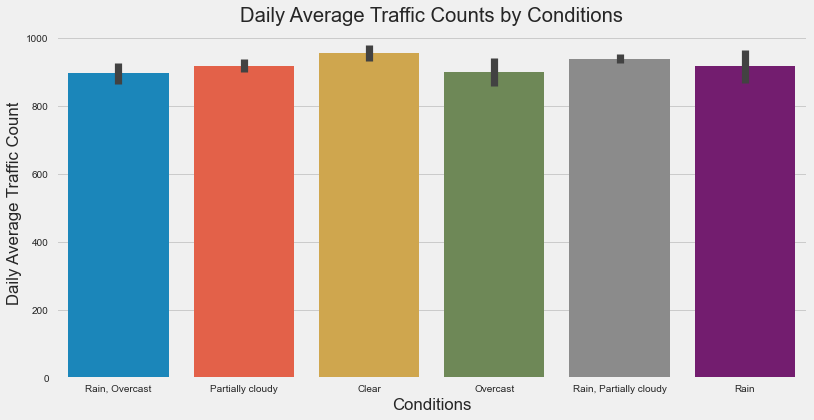

In [93]:
plot_avg_traffic_counts_by_conditions(trafficEB_merged)

In [94]:
def plot_daily_traffic_boxplot_by_conditions(df):
    """
    Plots a box plot of daily traffic for each condition.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Create a new column with a date-only version of 'startDatetime'
    df['date'] = df['startDatetime'].dt.date

    # Group the DataFrame by conditions and date, and calculate the daily traffic count for each group
    groupby_cols = ['Conditions', 'date']
    daily_counts = df.groupby(groupby_cols)['count'].sum().reset_index()

    # Create a box plot of the daily traffic counts grouped by conditions
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Conditions', y='count', data=daily_counts)
    plt.title('Daily Traffic Counts by Conditions')
    plt.xlabel('Conditions')
    plt.ylabel('Daily Traffic Count')
    plt.show()

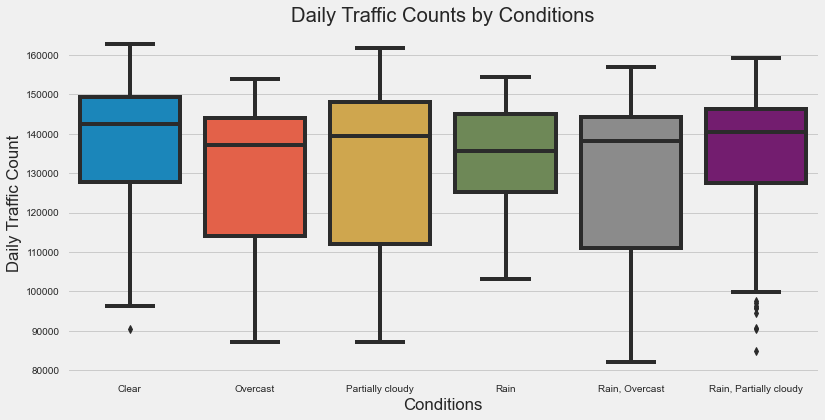

In [113]:
plot_daily_traffic_boxplot_by_conditions(trafficEB_merged)

It is interesting to note that on a clear traffic count is higher on average! I was thinking on clear days, people might choose to ride bicycles over cars. Perhaps, some people do choose to ride bicycles overs cars but the number is not large enough for us to see this increase on the graph, because perhaps there are more people choosing to travel because it a clear day while choosing not travel on an overcast day.

In [96]:
def plot_traffic_boxplot_by_holiday(df):
    """
    Plots a box plot of traffic count for each holiday type.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Create a new column with a date-only version of 'startDatetime'
    df['date'] = df['startDatetime'].dt.date

    # Group the DataFrame by holiday type ('Hol_type'), and calculate the daily traffic count for each group
    groupby_cols = ['Hol_type', 'date']
    daily_counts = df.groupby(groupby_cols)['count'].sum().reset_index()

    # Create a box plot of the daily traffic counts grouped by holiday type
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Hol_type', y='count', data=daily_counts)
    plt.title('Traffic Counts by Holiday Type')
    plt.xlabel('Holiday Type')
    plt.ylabel('Traffic Count')
    plt.show()


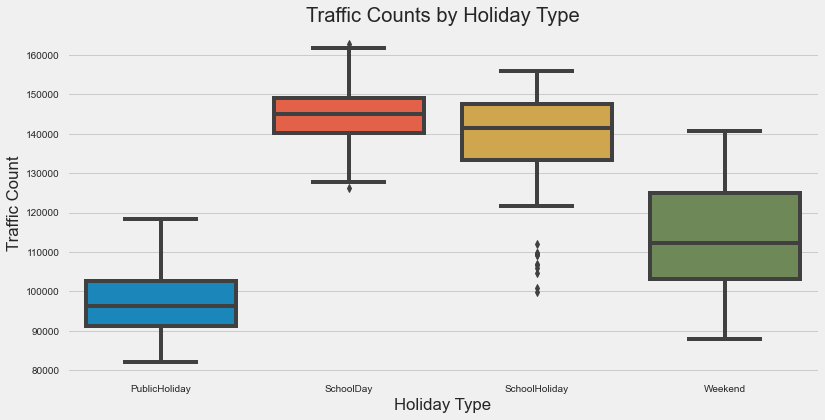

In [97]:
plot_traffic_boxplot_by_holiday(trafficEB_merged)

# 3. Imputing missing values

In [98]:
trafficWB_merged.head()

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,2018-01-01 00:00:00,1610011,1,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,00:00:00,1,0,0,2018
1,2018-01-01 01:00:00,1610011,1,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,01:00:00,1,1,0,2018
2,2018-01-01 02:00:00,1610011,1,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,02:00:00,1,2,0,2018
3,2018-01-01 03:00:00,1610011,1,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,03:00:00,1,3,0,2018
4,2018-01-01 04:00:00,1610011,1,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,04:00:00,1,4,0,2018


## 3.1 Imputing missing siteReferences

In [99]:
# Define a lambda function to extract the third character of the 'siteRef' column
get_direction = lambda x: str(x['siteRef'])[2]

# Use the lambda function to fill NaN values in the 'direction' column
trafficWB_merged['direction'] = trafficWB_merged.apply(lambda x: get_direction(x) if pd.isna(x['direction']) else x['direction'], axis=1)
trafficEB_merged['direction'] = trafficEB_merged.apply(lambda x: get_direction(x) if pd.isna(x['direction']) else x['direction'], axis=1)

In [100]:
trafficWB_merged

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,2018-01-01 00:00:00,1610011,1,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,00:00:00,1,0,0,2018
1,2018-01-01 01:00:00,1610011,1,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,01:00:00,1,1,0,2018
2,2018-01-01 02:00:00,1610011,1,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,02:00:00,1,2,0,2018
3,2018-01-01 03:00:00,1610011,1,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,03:00:00,1,3,0,2018
4,2018-01-01 04:00:00,1610011,1,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,04:00:00,1,4,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2019-12-31 19:00:00,1660013,4,777.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,19:00:00,12,19,1,2019
87596,2019-12-31 20:00:00,1660013,4,619.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,20:00:00,12,20,1,2019
87597,2019-12-31 21:00:00,1660013,4,556.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,21:00:00,12,21,1,2019
87598,2019-12-31 22:00:00,1660013,4,506.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,22:00:00,12,22,1,2019


## 3.2. Imputing missing traffic counts

### 3.2.1 For West Bound

In [101]:
# Compute the median count for each siteRef, dayOfweek, and hour combination
mean_counts = trafficWB_merged.groupby(['siteRef', 'dayOfweek', 'hour'])['count'].mean().reset_index()

# Merge the computed median counts with the dataframe
trafficWB_merged = pd.merge(trafficWB_merged, mean_counts, on=['siteRef', 'dayOfweek', 'hour'], how='left',suffixes=('', '_mean'))

# Fill the NaN values in the 'count' column with the computed median values
trafficWB_merged['count'] = trafficWB_merged['count'].fillna(trafficWB_merged['count_mean'])

# Drop the extra column used to store the median values
trafficWB_merged= trafficWB_merged.drop(columns=['count_mean'])

In [102]:
trafficWB_merged

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,2018-01-01 00:00:00,1610011,1,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,00:00:00,1,0,0,2018
1,2018-01-01 01:00:00,1610011,1,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,01:00:00,1,1,0,2018
2,2018-01-01 02:00:00,1610011,1,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,02:00:00,1,2,0,2018
3,2018-01-01 03:00:00,1610011,1,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,03:00:00,1,3,0,2018
4,2018-01-01 04:00:00,1610011,1,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,04:00:00,1,4,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2019-12-31 19:00:00,1660013,4,777.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,19:00:00,12,19,1,2019
87596,2019-12-31 20:00:00,1660013,4,619.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,20:00:00,12,20,1,2019
87597,2019-12-31 21:00:00,1660013,4,556.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,21:00:00,12,21,1,2019
87598,2019-12-31 22:00:00,1660013,4,506.0,174.634215,-36.849577,6130,Ramp,Continuous,8.7,SH16 Lincoln Rd Off Ramp WB,356.0,18595.0,18954.0,19149.0,16846.0,16922.0,Regional Continuous,2019-12-31,2019-12-31,17.0,23.0,19.0,13.7,71.49,16.5,0.0,0.00,7.0,64.0,1015.5,Partially cloudy,SchoolHoliday,31,22:00:00,12,22,1,2019


### 3.2.2 For East Bound

In [103]:
# Compute the median count for each siteRef, dayOfweek, and hour combination
mean_counts_EB = trafficEB_merged.groupby(['siteRef', 'dayOfweek', 'hour'])['count'].mean().reset_index()

# Merge the computed median counts with the dataframe
trafficEB_merged = pd.merge(trafficEB_merged, mean_counts_EB, on=['siteRef', 'dayOfweek', 'hour'],how='left', suffixes=('', '_mean'))

# Fill the NaN values in the 'count' column with the computed median values
trafficEB_merged['count'] = trafficEB_merged['count'].fillna(trafficEB_merged['count_mean'])

# Drop the extra column used to store the median values
trafficEB_merged= trafficEB_merged.drop(columns=['count_mean'])

In [104]:
trafficEB_merged['siteRef'].unique()

array([1620011, 1620013, 1640011, 1650011, 1650013, 1659011], dtype=int64)

In [105]:
trafficEB_merged.isna().sum()

startDatetime          0
siteRef                0
direction              0
count                  0
X                      0
Y                      0
OBJECTID               0
lane                   0
type                   0
percentHeavy           0
description            0
acceptedDays           0
AADT5yearsAgo          0
AADT4yearsAgo          0
AADT3yearsAgo          0
AADT2yearsAgo          0
AADT1yearAgo           0
siteType               0
date                   0
Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Wind Speed             0
Precipitation          0
Precipitation Cover    0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Conditions             0
Hol_type               0
day                    0
time                   0
month                  0
hour                   0
dayOfweek              0
year                   0
dtype: int64

In [106]:
trafficWB_merged.to_csv('trafficWB_data.csv')
trafficEB_merged.to_csv('trafficEB_data.csv')

In [107]:
#concat EB and WB data 
traffic = pd.concat([trafficWB_merged,trafficEB_merged])

In [108]:
traffic.to_csv('traffic.csv')

In [109]:
traffic.shape

(192720, 39)

In [110]:
traffic.head()

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,2018-01-01 00:00:00,1610011,1,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,00:00:00,1,0,0,2018
1,2018-01-01 01:00:00,1610011,1,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,01:00:00,1,1,0,2018
2,2018-01-01 02:00:00,1610011,1,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,02:00:00,1,2,0,2018
3,2018-01-01 03:00:00,1610011,1,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,03:00:00,1,3,0,2018
4,2018-01-01 04:00:00,1610011,1,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,04:00:00,1,4,0,2018


In [111]:
traffic.dtypes

startDatetime          datetime64[ns]
siteRef                         int64
direction                      object
count                         float64
X                             float64
Y                             float64
OBJECTID                        int64
lane                           object
type                           object
percentHeavy                  float64
description                    object
acceptedDays                  float64
AADT5yearsAgo                 float64
AADT4yearsAgo                 float64
AADT3yearsAgo                 float64
AADT2yearsAgo                 float64
AADT1yearAgo                  float64
siteType                       object
date                   datetime64[ns]
Date time                      object
Minimum Temperature           float64
Maximum Temperature           float64
Temperature                   float64
Dew Point                     float64
Relative Humidity             float64
Wind Speed                    float64
Precipitatio